In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm, trange
from matplotlib import animation
from scipy.signal import hilbert
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import h5py

from bandpass_filter import butter_bandpass_filter
from hilbert_phase import hilbert_phase_extract
from coherence_LEiDA import coherenceMap, leadingEigenVec

In [2]:
num = 1
df = pd.read_csv(f"../data/AALdata_27042022/sub-{(num):04d}_faces.csv",sep=",", header=None)
df.shape

(90, 330)

### Preprocesse band pass filter vs scipy bandpass

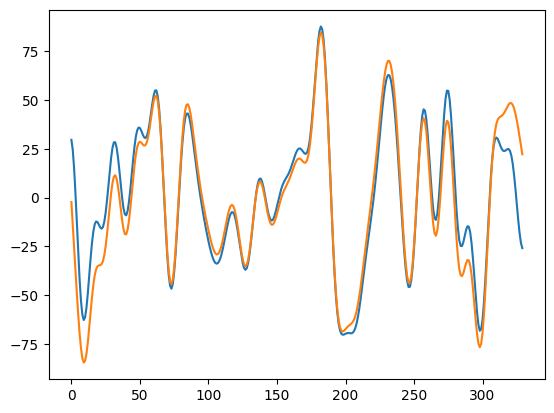

In [14]:
area1 = df.iloc[0].values
out = butter_bandpass_filter(area1)

plt.plot(area1)
plt.plot(out)

### Test of filtering

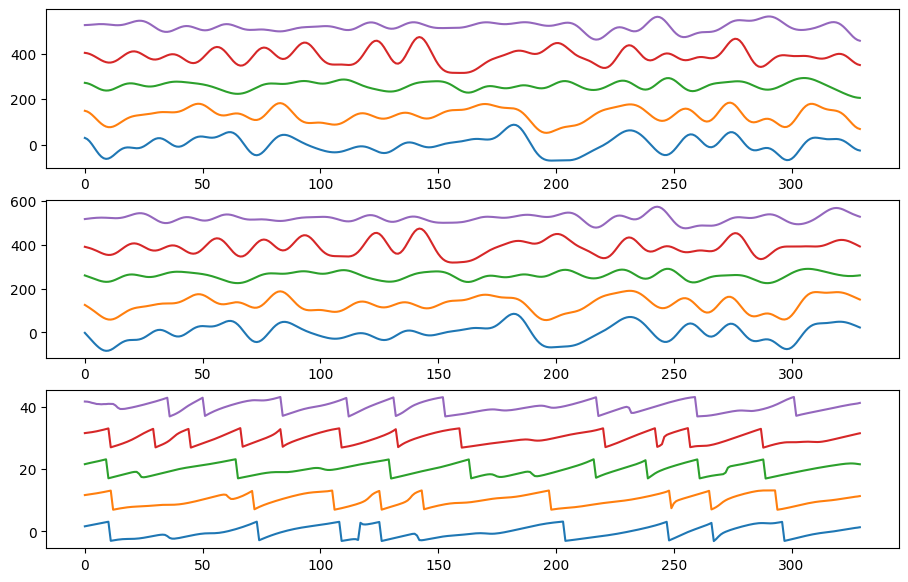

In [15]:
fig, (ax) = plt.subplots(3, 1, figsize=(11,7))

org = df.values
band = butter_bandpass_filter(org)
hil1 = hilbert_phase_extract(band)

for i in range(5):
    ax[0].plot(org[i] + 130 * i)
    ax[1].plot(band[i] + 130 *i)
    ax[2].plot(hil1[i]+ 10 * i)


plt.show()

### Hilbert comparison

In [7]:
a = df.values[0,:10]
print(f"a: {a}")
print("----")
h = hilbert(a)
h_r = np.real(h)
h_i = np.imag(h)
print(h)
print("----")
print(h_r)
print("----")
print(h_i)
print("----")
print(np.arctan(h_i/h_r) - np.angle(h))
print("----")
k = h_i/h_r
print(f"k:{k}")
print(np.arctan(k))
print("----")
print(np.all(np.arctan2(h_i,h_r) == np.angle(h)))
print("----")
print(np.angle(h))


a: [-2.1503526  -2.2429261  -2.34837257 -2.32638582 -2.01053236 -1.25136206
  0.04041437  1.85949773  4.08776564  6.49690114]
----
[-2.1503526 +5.98792897j -2.2429261 +1.00802313j -2.34837257+1.17726107j
 -2.32638582-0.52629013j -2.01053236-1.25783366j -1.25136206-2.19765862j
  0.04041437-3.19694703j  1.85949773-2.4709762j   4.08776564-2.71040934j
  6.49690114+4.18690182j]
----
[-2.1503526  -2.2429261  -2.34837257 -2.32638582 -2.01053236 -1.25136206
  0.04041437  1.85949773  4.08776564  6.49690114]
----
[ 5.98792897  1.00802313  1.17726107 -0.52629013 -1.25783366 -2.19765862
 -3.19694703 -2.4709762  -2.71040934  4.18690182]
----
[-3.14159265 -3.14159265 -3.14159265  3.14159265  3.14159265  3.14159265
  0.          0.          0.          0.        ]
----
k:[ -2.78462656  -0.44942325  -0.50130932   0.2262265    0.62562219
   1.75621325 -79.10421631  -1.32884067  -0.663054     0.64444598]
[-1.2260248  -0.42237419 -0.46469452  0.22248154  0.55904661  1.05317554
 -1.55815545 -0.92567436 -0

## Hilbert conclusion

`np.angle` should be used!!! since is uses `np.arctan2` which correctly threats negatives and positives

# Cohenrence map

In [16]:
subject1 = hilbert_phase_extract(df.values)
subject1.shape

(90, 330)

(330, 90, 90)


<IPython.core.display.Javascript object>


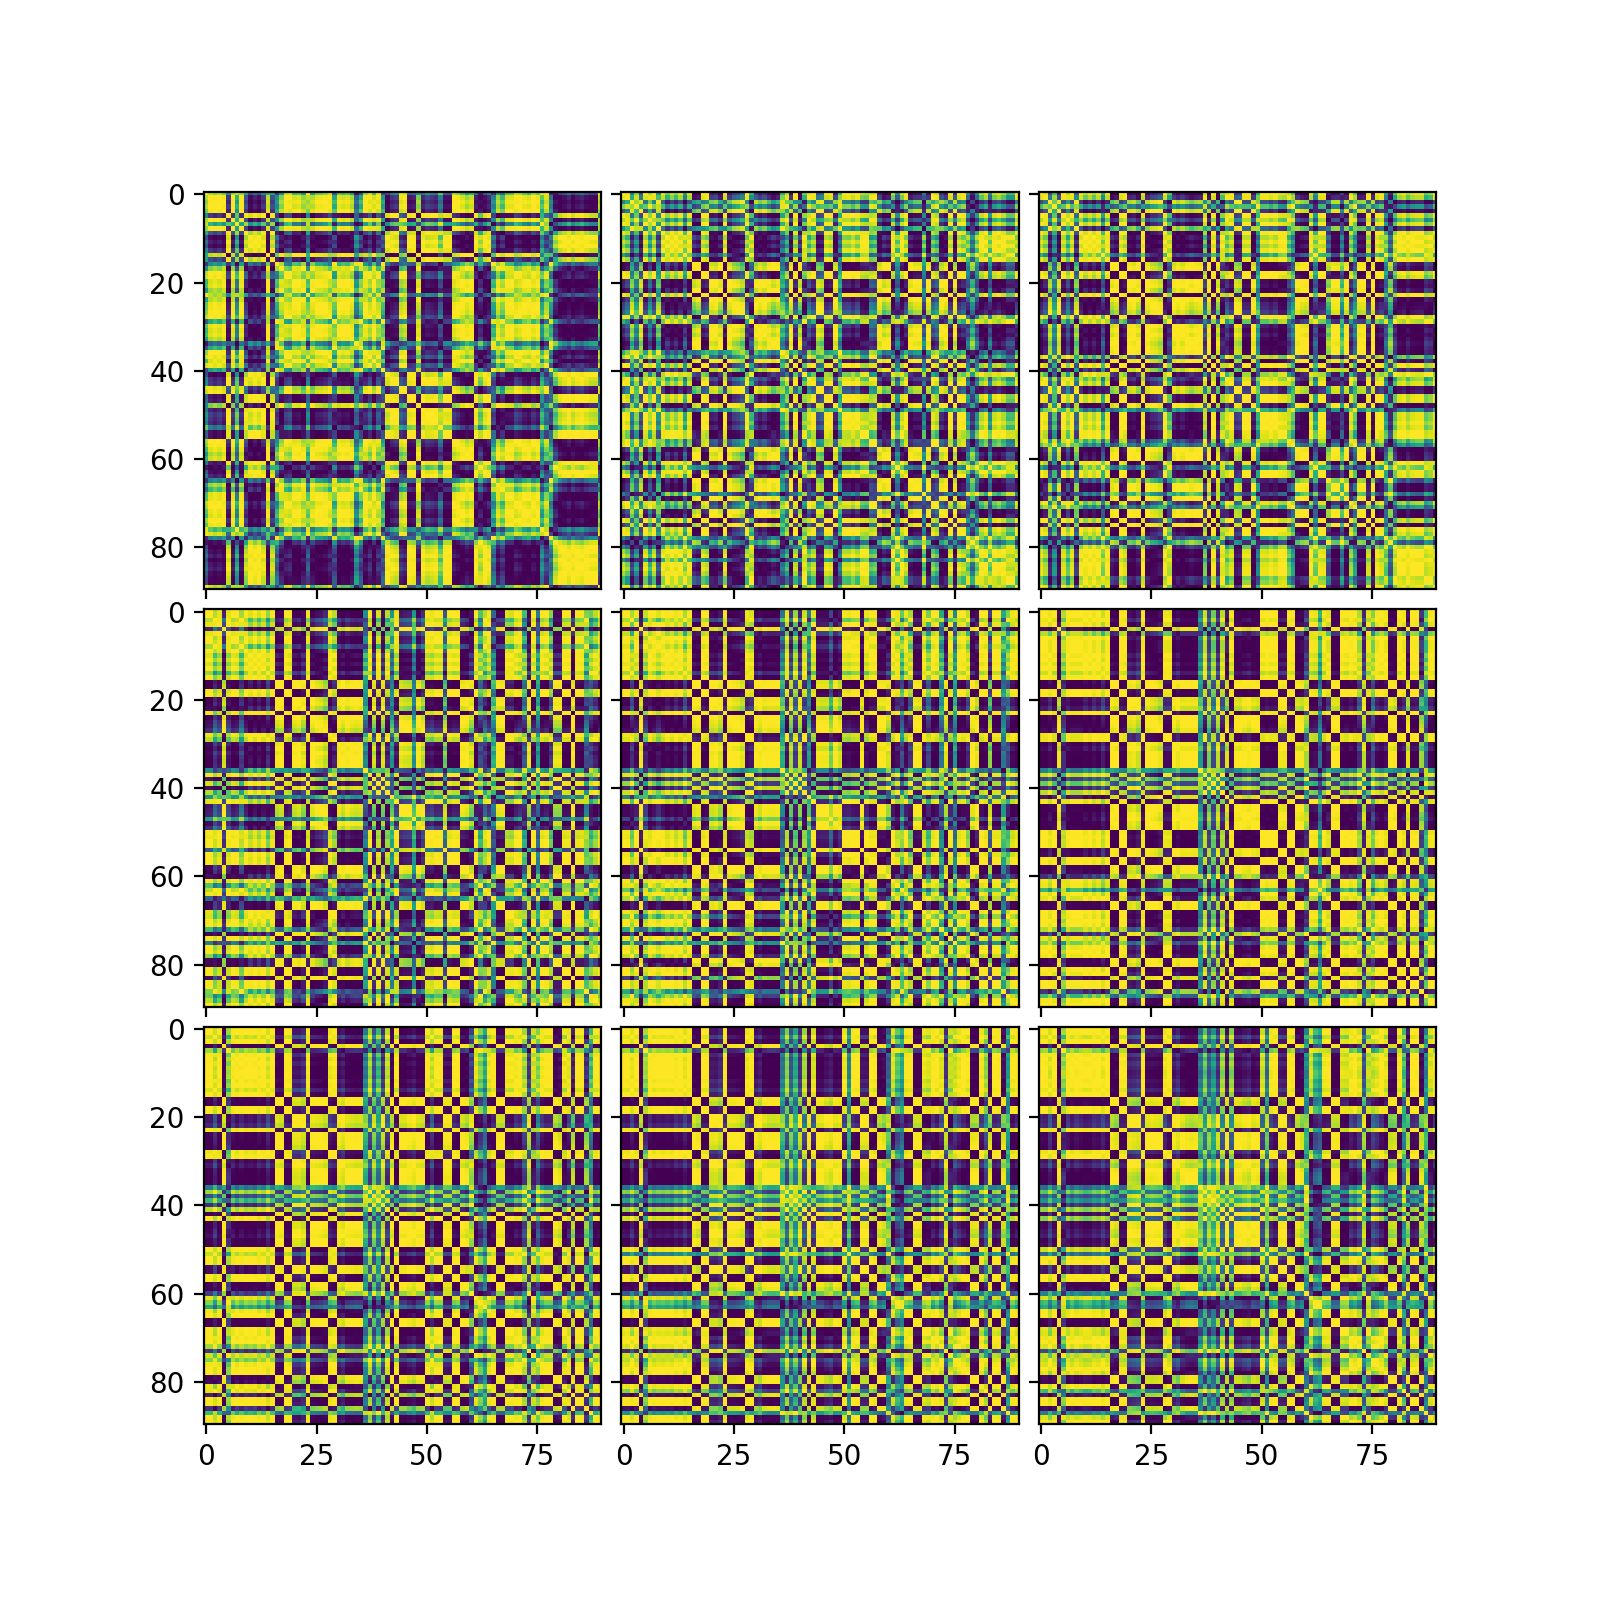

In [18]:
maps = coherenceMap(subject1)
print(maps.shape)

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, maps[:9]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

In [24]:
plt.imshow(maps[0])

<IPython.core.display.Javascript object>


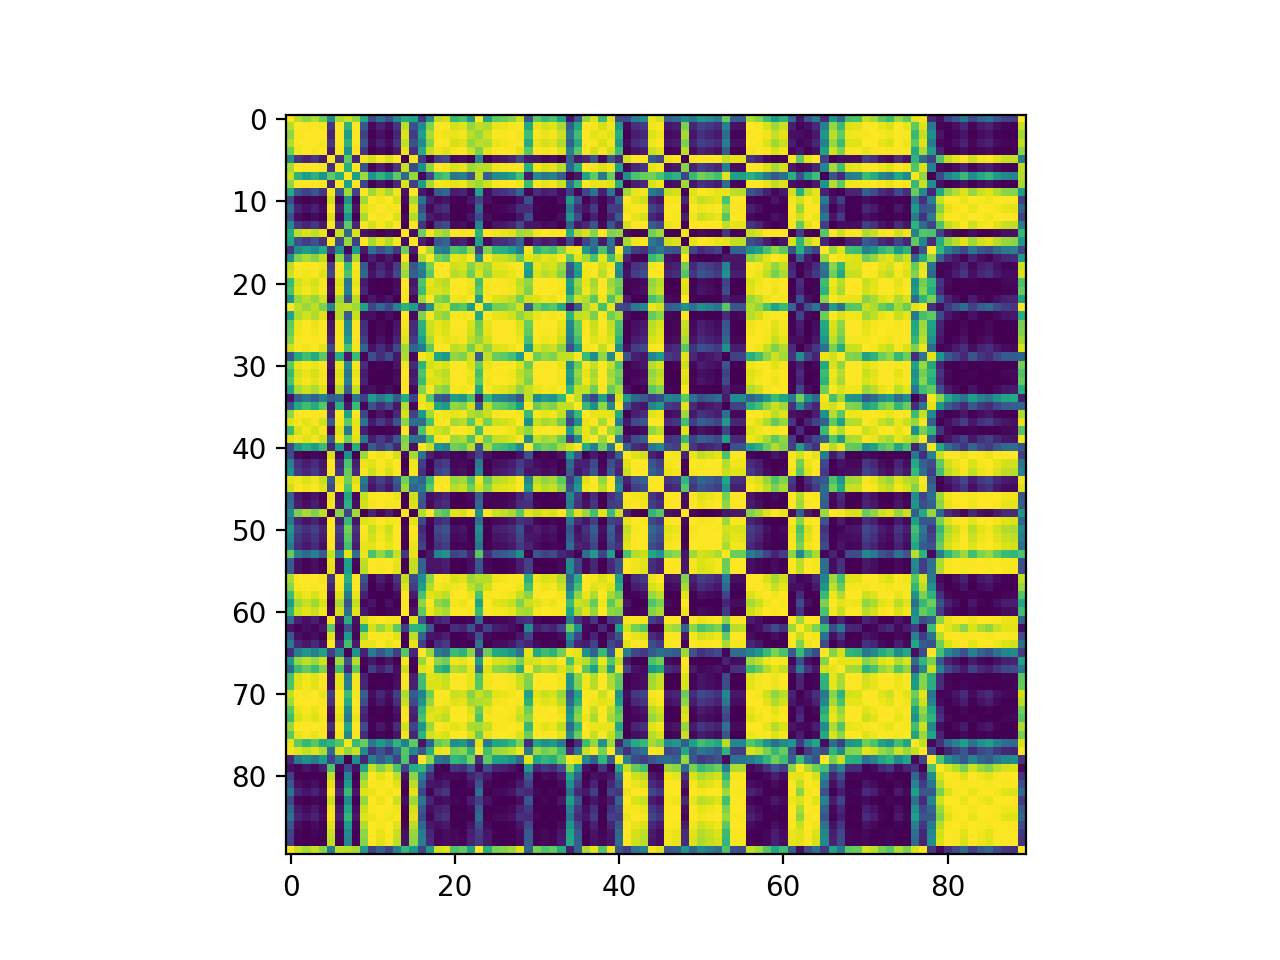

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

In [22]:
%matplotlib notebook

fig, ax = plt.subplots()
#fig.colorbar()
ims = []
for i in range(320):

    im = ax.imshow(maps[i], animated=True)
    plt.colorbar()
    if i == 0:
        ax.imshow(np.ones((90,90)))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [92]:
a = leadingEigenVec(maps)
a.shape
a

array([[-0.12087808, -0.12090618,  0.11554619, ..., -0.1079016 ,
        -0.11772926, -0.02944877],
       [-0.09597607, -0.08559862,  0.13878943, ..., -0.14063595,
         0.00720161, -0.10811588],
       [-0.11775506, -0.11722504,  0.12603085, ..., -0.11944788,
        -0.05711702, -0.101585  ],
       ...,
       [-0.11590567, -0.11150015,  0.11180299, ..., -0.09385478,
        -0.11269681, -0.10506774],
       [-0.11288126, -0.11030786,  0.11062044, ..., -0.09758889,
        -0.11128123, -0.10527492],
       [-0.11256929, -0.11212587,  0.11092227, ..., -0.11198072,
        -0.11110153, -0.09154566]])

<BarContainer object of 90 artists>

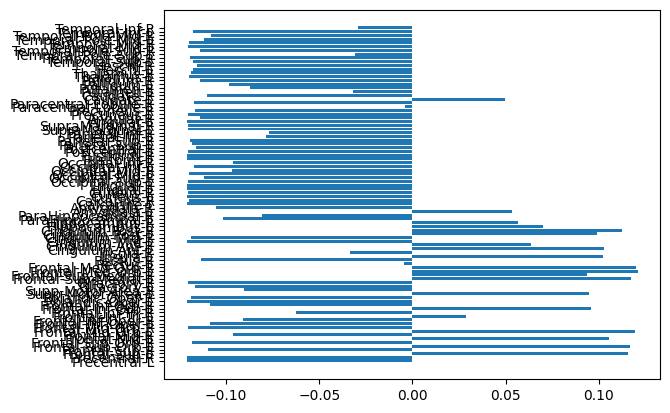

In [69]:
dflabels = pd.read_csv('../data/AAL_brain_roi.csv')
brain_roi = dflabels['labels'].to_list()
plt.barh(brain_roi, a[0])

In [70]:
print(a.shape)

np.savez('all_subject')

(330, 90)

## Preprocessing files

In [2]:
#read all datafiles

data_root = "../data/AALdata_27042022"

num_subjects = 216 #highest ID of face filename

notfound = {}


with h5py.File('dataset_all_subjects_LEiDA.hdf5', 'w') as hf:

    for i in trange(num_subjects):
        try:
            df = pd.read_csv(f"{data_root}/sub-{(i+1):04d}_faces.csv",sep=",",header=None)
        except FileNotFoundError:
            notfound[i] = f"{(i+1):04d}"
            continue

        subject_id = f'subject_{(i+1):04d}_LEiDA'


        subject_ = df.values
        # Preproccesing

        # 1. Bandpass filtering
        subject_f = butter_bandpass_filter(subject_)

        # 2. Hilbert transform and extract phase.
        subject_phase = hilbert_phase_extract(subject_f)

        # 3. Coherencemap -> T x cohenrece maps
        subject_coherence_maps = coherenceMap(subject_phase)

        # 4. Extract Leading Eigenvector of Coherencemap -> LEiDA
        subject_LEiDA = leadingEigenVec(subject_coherence_maps)

        
        
        hf.create_dataset(subject_id, data=subject_LEiDA)
        
    #     #Add the i'th subject  to dataframe 
    #     X = LEiDA_Signal if i == 0 else np.hstack((X,LEiDA_Signal))

    print(f"files not found {[*notfound.values()]}")
    print(f"Number of files not found: {len(notfound)}")


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 216/216 [02:50<00:00,  1.26it/s]

files not found ['0022', '0023', '0032', '0068', '0072', '0073', '0086', '0089', '0106', '0107', '0140', '0144', '0147', '0152', '0162', '0178', '0216']
Number of files not found: 17


### HDF5 read test

In [9]:
with h5py.File('dataset_all_subjects_LEiDA.hdf5', mode='r') as dataf:
    print(len(dataf.keys()))
    for subject in list(dataf.keys()):
        l = np.array(dataf[subject])
        print(l.shape)

199
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 90)
(330, 

In [12]:
f = h5py.File('dataset_all_subjects_LEiDA.hdf5', mode='r')
f.close()
f

<Closed HDF5 file>

### Dataset 2